## Explatory Data Analysis

### Introduction

At this point we have a general idea about our data. We have 15 categorical variables and three numerical variables. We are interested in creating a model that can predict whether a person has heart disease or not, given their BMI, AlcoholDrinking, Kidney Disease, etc. We can expect to see a lot of graphs in this notebook showing similarities in 2 or more categories. 

#### Imports

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import scale


In [5]:
hearts = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 2\\Personal Key Indicators of Heart Disease\\heart_2020_cleaned.csv")

In [6]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
hearts.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [12]:
hearts.HeartDisease.value_counts(normalize=True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [13]:
hearts.Smoking.value_counts(normalize=True)

No     0.587523
Yes    0.412477
Name: Smoking, dtype: float64

In [14]:
hearts.AlcoholDrinking.value_counts(normalize=True)

No     0.931903
Yes    0.068097
Name: AlcoholDrinking, dtype: float64

In [15]:
hearts.Stroke.value_counts(normalize=True)

No     0.96226
Yes    0.03774
Name: Stroke, dtype: float64

In [18]:
hearts.PhysicalHealth.value_counts(ascending=False, normalize=True).head()

0.0     0.708545
30.0    0.061005
2.0     0.046530
1.0     0.032799
3.0     0.026945
Name: PhysicalHealth, dtype: float64

In [19]:
hearts.MentalHealth.value_counts(ascending=False, normalize=True).head()

0.0     0.642290
30.0    0.054325
2.0     0.051580
5.0     0.044244
10.0    0.032874
Name: MentalHealth, dtype: float64

In [45]:
hearts.DiffWalking.value_counts(ascending=False, normalize=True)

No     0.86113
Yes    0.13887
Name: DiffWalking, dtype: float64

In [46]:
hearts.Race.value_counts(ascending=False, normalize=True)

White                             0.766779
Hispanic                          0.085824
Black                             0.071730
Other                             0.034172
Asian                             0.025229
American Indian/Alaskan Native    0.016267
Name: Race, dtype: float64

In [47]:
hearts.Diabetic.value_counts(ascending=False, normalize=True)

No                         0.843206
Yes                        0.127588
No, borderline diabetes    0.021204
Yes (during pregnancy)     0.008002
Name: Diabetic, dtype: float64

In [48]:
hearts.PhysicalActivity.value_counts(ascending=False, normalize=True)

Yes    0.775362
No     0.224638
Name: PhysicalActivity, dtype: float64

In [49]:
hearts.GenHealth.value_counts(ascending=False, normalize=True)

Very good    0.356034
Good         0.291215
Excellent    0.209015
Fair         0.108435
Poor         0.035301
Name: GenHealth, dtype: float64

In [50]:
hearts.Asthma.value_counts(ascending=False, normalize=True)

No     0.865939
Yes    0.134061
Name: Asthma, dtype: float64

In [51]:
hearts.KidneyDisease.value_counts(ascending=False, normalize=True)

No     0.963167
Yes    0.036833
Name: KidneyDisease, dtype: float64

In [52]:
hearts.SkinCancer.value_counts(ascending=False, normalize=True)

No     0.906756
Yes    0.093244
Name: SkinCancer, dtype: float64

Here we can be say few things, we have quite a few variables that need scaling. Variables like HeartDisease, Stroke, AlcoholDrinking, DiffWalking, Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer is not something that is very common, which is a good thing obviously. 

We also can see that almost 77% of instances consists "white" while all others categories in Race are less than 10%. 

In [31]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Text(0.5, 1.0, 'BMI vs Alcohol Drinking')

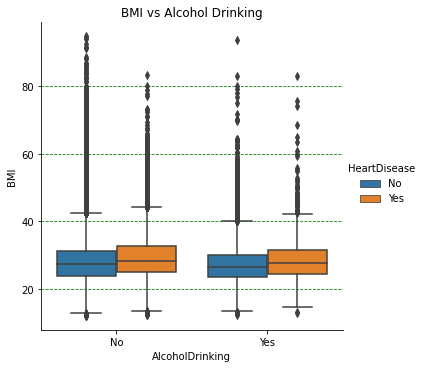

In [58]:
sns.catplot(x = 'AlcoholDrinking', y = 'BMI', hue = 'HeartDisease',kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Alcohol Drinking")

In [132]:
hearts[hearts['BMI'] > 45].count().head(3)

HeartDisease    6261
BMI             6261
Smoking         6261
dtype: int64

Text(0.5, 1.0, 'BMI vs Smoking')

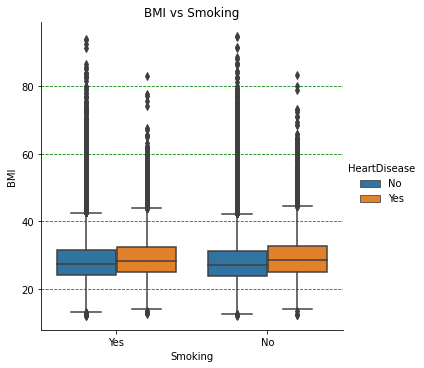

In [60]:
sns.catplot(x = 'Smoking', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Smoking")

Text(0.5, 1.0, 'BMI vs Stroke')

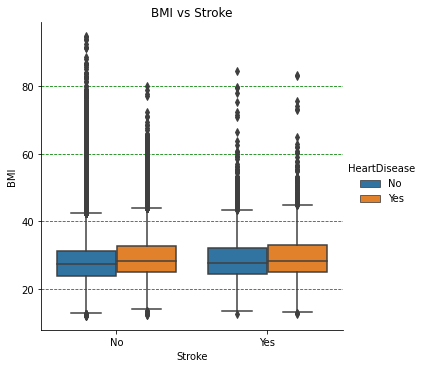

In [61]:
sns.catplot(x = 'Stroke', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Stroke")

Text(0.5, 1.0, 'BMI vs Sex')

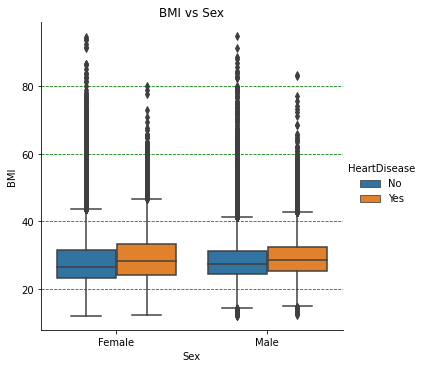

In [62]:
sns.catplot(x = 'Sex', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Sex")

Text(0.5, 1.0, 'BMI vs Race')

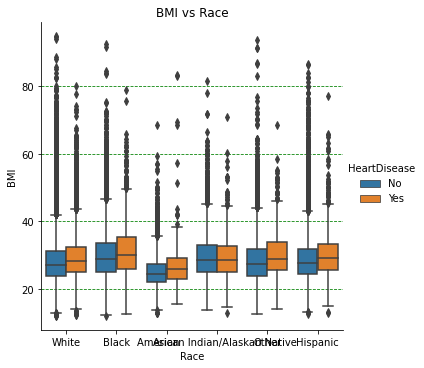

In [64]:
sns.catplot(x = 'Race', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Race")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Yes'),
  Text(1, 0, 'No'),
  Text(2, 0, 'No, borderline diabetes'),
  Text(3, 0, 'Yes (during pregnancy)')])

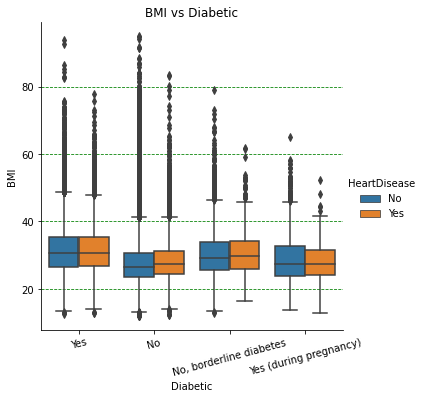

In [66]:
sns.catplot(x = 'Diabetic', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Diabetic")
plt.xticks(rotation = 15)

Text(0.5, 1.0, 'BMI vs Asthma')

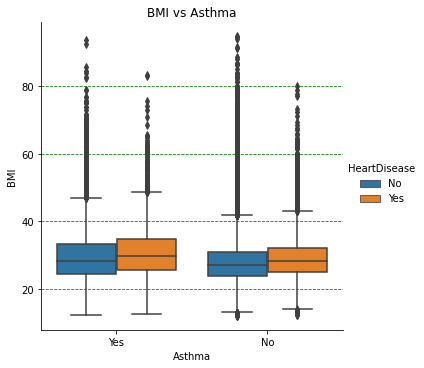

In [67]:
sns.catplot(x = 'Asthma', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Asthma")

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

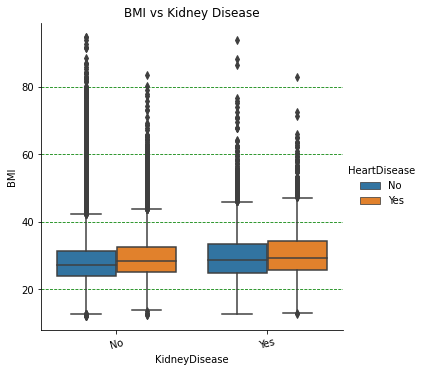

In [68]:
sns.catplot(x = 'KidneyDisease', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Kidney Disease")
plt.xticks(rotation = 15)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

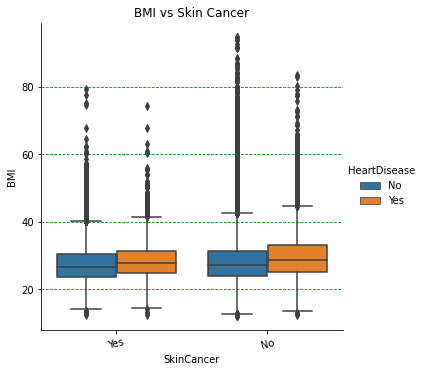

In [69]:
sns.catplot(x = 'SkinCancer', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("BMI vs Skin Cancer")
plt.xticks(rotation = 15)

In [44]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

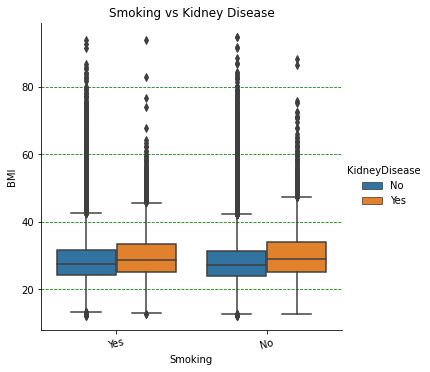

In [71]:
sns.catplot(x = 'Smoking', y = 'BMI', hue = 'KidneyDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("Smoking vs Kidney Disease")
plt.xticks(rotation = 15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '55-59'),
  Text(1, 0, '80 or older'),
  Text(2, 0, '65-69'),
  Text(3, 0, '75-79'),
  Text(4, 0, '40-44'),
  Text(5, 0, '70-74'),
  Text(6, 0, '60-64'),
  Text(7, 0, '50-54'),
  Text(8, 0, '45-49'),
  Text(9, 0, '18-24'),
  Text(10, 0, '35-39'),
  Text(11, 0, '30-34'),
  Text(12, 0, '25-29')])

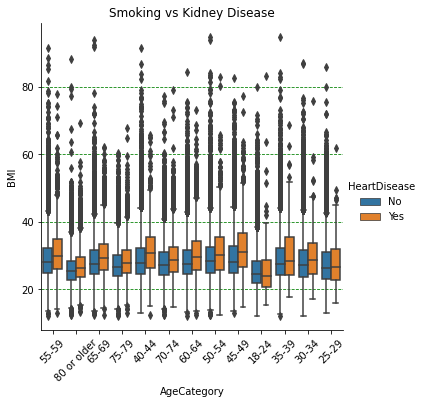

In [83]:
sns.catplot(x = 'AgeCategory', y = 'BMI', hue = 'HeartDisease', kind = 'box', data = hearts)
plt.grid(color = 'g', linestyle = '--', axis = 'y')
plt.title("Smoking vs Kidney Disease")
plt.xticks(rotation = 45)

In [85]:
for col in hearts:
    print(f"{col} unique values are:")
    print(hearts[col].unique())

HeartDisease unique values are:
['No' 'Yes']
BMI unique values are:
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking unique values are:
['Yes' 'No']
AlcoholDrinking unique values are:
['No' 'Yes']
Stroke unique values are:
['No' 'Yes']
PhysicalHealth unique values are:
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth unique values are:
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking unique values are:
['No' 'Yes']
Sex unique values are:
['Female' 'Male']
AgeCategory unique values are:
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race unique values are:
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic unique values are:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity un

##### Trying out PCA

In [97]:
hearts_new = hearts.copy()

In [98]:
hearts_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [99]:
hearts_new.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [115]:
hearts_new_dummies = pd.get_dummies(hearts_new)
hearts_new_dummies_columns = hearts_new_dummies.columns
hearts_new_dummies.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,8.0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [104]:
hearts_new_scaled = scale(hearts_new_dummies)

In [113]:
hearts_new_scaled_df = pd.DataFrame(hearts_new_scaled, columns = hearts_new_dummies_columns)

In [114]:
hearts_new_scaled_df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,-1.844750,-0.046751,3.281069,-1.460354,0.305954,-0.305954,-1.193474,1.193474,0.27032,-0.27032,...,-0.348745,-0.640987,-0.191292,1.344886,-2.541515,2.541515,0.195554,-0.195554,-3.118419,3.118419
1,-1.256338,-0.424070,-0.490039,-0.067601,0.305954,-0.305954,0.837890,-0.837890,0.27032,-0.27032,...,-0.348745,-0.640987,-0.191292,1.344886,0.393466,-0.393466,0.195554,-0.195554,0.320675,-0.320675
2,-0.274603,2.091388,3.281069,0.628776,0.305954,-0.305954,-1.193474,1.193474,0.27032,-0.27032,...,2.867422,-0.640987,-0.191292,-0.743558,-2.541515,2.541515,0.195554,-0.195554,0.320675,-0.320675
3,-0.647473,-0.424070,-0.490039,-0.763977,0.305954,-0.305954,0.837890,-0.837890,0.27032,-0.27032,...,-0.348745,1.560094,-0.191292,-0.743558,0.393466,-0.393466,0.195554,-0.195554,-3.118419,3.118419
4,-0.726138,3.097572,-0.490039,0.628776,0.305954,-0.305954,0.837890,-0.837890,0.27032,-0.27032,...,-0.348745,-0.640987,-0.191292,1.344886,0.393466,-0.393466,0.195554,-0.195554,0.320675,-0.320675


In [121]:
hearts_new_scaled_df.mean().head()

BMI               -8.982963e-16
PhysicalHealth     8.298850e-15
MentalHealth      -7.510435e-15
SleepTime         -2.645035e-15
HeartDisease_No    8.318650e-15
dtype: float64

In [120]:
hearts_new_scaled_df.std().head()

BMI                1.000002
PhysicalHealth     1.000002
MentalHealth       1.000002
SleepTime          1.000002
HeartDisease_No    1.000002
dtype: float64

In [123]:
hearts_new_scaled_df.std(ddof=0).head()

BMI                1.0
PhysicalHealth     1.0
MentalHealth       1.0
SleepTime          1.0
HeartDisease_No    1.0
dtype: float64

In [125]:
hearts_pca = PCA().fit(hearts_new_scaled)

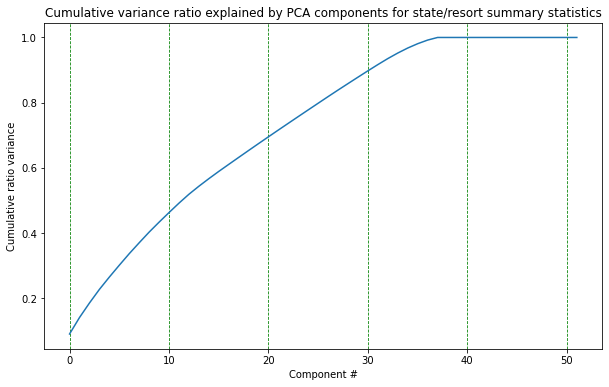

In [128]:
plt.subplots(figsize=(10, 6))
plt.plot(hearts_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');
plt.grid(color = 'g', linestyle = '--', axis = 'x')

In [129]:
hearts_pca_x = hearts_pca.transform(hearts_new_scaled)

In [131]:
hearts_pca_x.shape

(319795, 52)

##### Outliers

In [135]:
hearts_new.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [139]:
hearts_new[hearts_new['BMI'] > 45].count().head()

HeartDisease       6261
BMI                6261
Smoking            6261
AlcoholDrinking    6261
Stroke             6261
dtype: int64

In [145]:
hearts_new[hearts_new['BMI'] < 16].count().head()

HeartDisease       691
BMI                691
Smoking            691
AlcoholDrinking    691
Stroke             691
dtype: int64